---

# Project Description

I am working at a startup that sells food products. I need to investigate user behavior for the company's app.

First we will study the sales funnel. We are finding out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?


Then we will look at the results of an A/A/B test. We would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. We decide to make a decision based on the results of an A/A/B test.


The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. We are finding out which set of fonts produces better results.


Creating two A groups has certain advantages. We can make it a principle that we will only be confident in the accuracy of our testing when the two control groups are similar. If there are significant differences between the A groups, this can help us uncover factors that may be distorting the results. Comparing control groups also tells us how much time and data we'll need when running further tests.

### Description of the data

Each log entry is a user action or an event.

- EventName — event name
- DeviceIDHash — unique user identifier
- EventTimestamp — event time
- ExpId — experiment number: 246 and 247 are the control groups, 248 is the test group

# Project Goal

We will be using the same dataset for general analytics and for A/A/B analysis. In real projects, experiments are constantly being conducted. We would study the quality of an app using general data, without paying attention to whether users are participating in experiments.

# Project Contents

-  <a href='#the_destination1'>Open the data file and read the general information:</a>
-  <a href='#the_destination2'>Prepare the data for analysis:</a>
-  <a href='#the_destination3'>Study and check the data:</a>
-  <a href='#the_destination4'>Study the event funnel:</a>
-  <a href='#the_destination5'>Study the results of the experiment:</a>
-  <a href='#the_destination6'>Overall conclusion:</a>

<a id='the_destination1'></a>
# Step 1. Open the data file and read the general information

**Importing the libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import math as mth
from scipy import stats as st

**Information for the "logs_exp_us" dataset:**

In [2]:
try:
    logs_exp = pd.read_csv('logs_exp_us.csv', sep='\t')
except:
    logs_exp = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
logs_exp.info()
display(logs_exp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In the "logs_exp" dataset, there are 244126 rows and 4 columns named "EventName", "DeviceIDHash", "EventTimestamp", "ExpId".

<a id='the_destination2'></a>
# Step 2. Prepare the data for analysis

**Renaming "logs_exp" dataset columns:**

In [3]:
logs_exp =  logs_exp.rename({'EventName': 'event_name', 'DeviceIDHash': 'device_id','EventTimestamp':'event_time_stamp','ExpId':'exp_id' }, axis='columns')
list(logs_exp.columns)

['event_name', 'device_id', 'event_time_stamp', 'exp_id']

I renamed all of the column names. The new column names are "event_name", "device_id", "event_time_stamp", "exp_id".

**Checking data types:**

In [4]:
logs_exp.dtypes

event_name          object
device_id            int64
event_time_stamp     int64
exp_id               int64
dtype: object

In the "logs_exp" dataset, "event_name" column is the object data type and rest of the columns are integer data types.

**Converting "event_time_stamp" column integer to datetime format:**

In [5]:
logs_exp['event_date_n_time']=pd.to_datetime(logs_exp['event_time_stamp'], unit='s')
display(logs_exp.head())

,event_name,device_id,event_time_stamp,exp_id,event_date_n_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


"event_time_stamp" column was integer data type. I converted it from integer to "to_datetime" format.

**Splitting "event_date_n_time" column into separate date and time columns:**

In [6]:
logs_exp['Dates'] = pd.to_datetime(logs_exp['event_date_n_time']).dt.date
logs_exp['Time'] = pd.to_datetime(logs_exp['event_date_n_time']).dt.time
logs_exp['Dates'] = logs_exp['Dates'].astype('datetime64[ns]')
display(logs_exp.head())

,event_name,device_id,event_time_stamp,exp_id,event_date_n_time,Dates,Time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,11:48:42


I splitted "event_date_n_time" column into separate date and time columns.

**Checking missing values in the 'logs_exp' dataset:**

In [7]:
logs_exp.isnull().sum()

event_name           0
device_id            0
event_time_stamp     0
exp_id               0
event_date_n_time    0
Dates                0
Time                 0
dtype: int64

There is no missing values in the "logs_exp" dataset.

-  I renamed all of the column names. The new column names are "event_name", "device_id", "event_time_stamp", "exp_id".
-  In the "logs_exp" dataset, "event_name" column is the object data type and rest of the columns are integer data types.
-  "event_time_stamp" column was integer data type. I converted it from integer to "to_datetime" format.
-  I splitted "event_date_n_time" column into separate date and time columns.
-  There is no missing values in the "logs_exp" dataset.

<a id='the_destination3'></a>
# Step 3. Study and check the data

**Number of events are in the logs:**

In [8]:
logs_exp['event_name'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64

There are five events named "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial". "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have 119205, 46825, 42731, 34313, 1052 events respectively.

**Number of users are in the logs:**

In [9]:
logs_exp['device_id'].value_counts().sum()

244126

In the "logs_exp" dataset, there are 244126 users in the logs.

**Finding the maximum and the minimum Dates:**

In [10]:
max_date = logs_exp['event_date_n_time'].max()
print('Maximum date is:', max_date)
min_date = logs_exp['event_date_n_time'].min()
print('Minimum date is:', min_date)

Maximum date is: 2019-08-07 21:15:17
Minimum date is: 2019-07-25 04:43:36


In the "logs_exp" dataset, maximum date is "2019-08-07" and minimum date is "2019-07-25".

**Number of event for each date:**

In [11]:
event = logs_exp.groupby('Dates')['event_name'].count().reset_index()
event = event.rename({'event_name': 'number_of_event',  }, axis='columns')
event.head(15)

,Dates,number_of_event
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,413
6,2019-07-31,2031
7,2019-08-01,36229
8,2019-08-02,35606
9,2019-08-03,33351


Number of events are increased from the beginning of August.

---

**Determining the average number of events per user:**

In [12]:
logs_exp.groupby('device_id')['event_name'].count().mean()

32.33028737915508

The average number of events per user is 32. 

**Plotting histogram by date and time:**

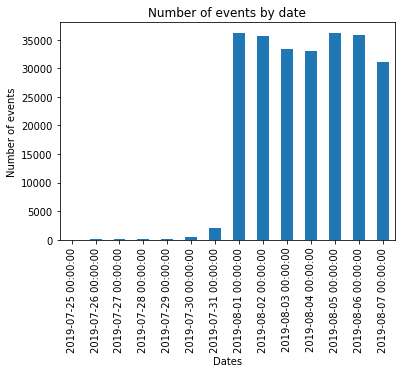

In [13]:
logs_exp.groupby('Dates')['event_name'].count().plot(kind="bar")
plt.title('Number of events by date')
plt.xlabel('Dates')
plt.ylabel('Number of events');

From the above histogram we can see that, from 25th July to 31st July number of events were very less compared to from 1st of August to 7th of August.

**Proportion of events by date:**

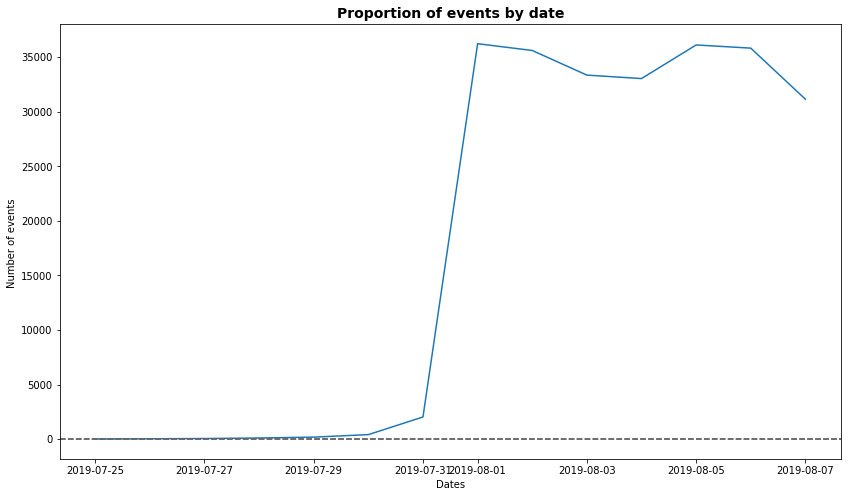

In [14]:
plt.figure(figsize = (14,8))
plt.title('Proportion of events by date',fontsize=14,fontweight="bold")
plt.xlabel('Dates')
plt.ylabel('Number of events ')
plt.plot(logs_exp.groupby('Dates')['event_name'].count())
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

**Raw distribution  of events by date:**

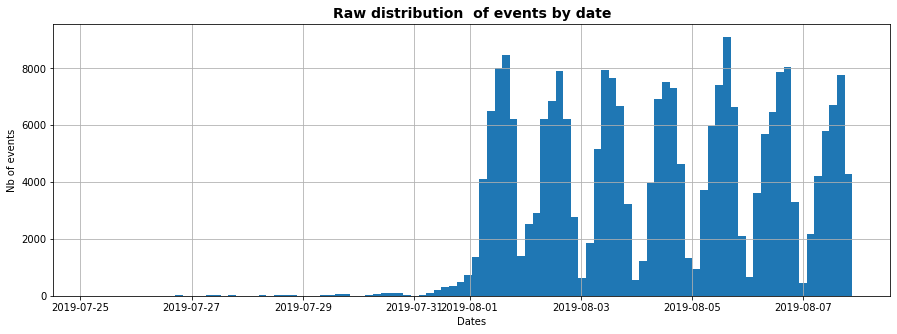

In [15]:
plt.title('Raw distribution  of events by date',fontsize=14,fontweight="bold")
plt.xlabel('Dates')
plt.ylabel('Nb of events')
ax = logs_exp['event_date_n_time'].hist(figsize=(15, 5),bins=100);

**Filter old events:**

In [16]:
new_logs = logs_exp.loc[logs_exp['Dates'] > '2019-07-31']
number_of_new_logs = len(new_logs)
print(number_of_new_logs)

241298


To get a better representation of the data, let's consider the period from 2019/08/01 to 2019/08/08. We get 241298 events in the month of August.

**Number of events in the old distribution and new distribution:**

In [17]:
number_of_old_logs =len (logs_exp['Dates'])
print('Number of events in old distribution:',number_of_old_logs)
number_of_new_logs =len (new_logs['Dates'])
print('Number of events in new distribution:',number_of_new_logs)

Number of events in old distribution: 244126
Number of events in new distribution: 241298


Number of events in old distribution and new distribution were 244126 and 241298 respectively.

**Calculating number of dropped data and percentage:**

In [18]:
dropped_data = number_of_old_logs - number_of_new_logs
print("Number of dropped data after excluding older data:", dropped_data)
percentage_of_dropped_logs = ( dropped_data / number_of_old_logs ) * 100
print("Percentage of dropped data:", int(percentage_of_dropped_logs))

Number of dropped data after excluding older data: 2828
Percentage of dropped data: 1


We have dropped 2828 data and the percentage of dropped data are 1%.

-  There are five events named "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial". "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have 119205, 46825, 42731, 34313, 1052 events respectively.
-  In the "logs_exp" dataset, there are 244126 users in the logs.
-  In the "logs_exp" dataset, maximum date is "2019-08-07" and minimum date is "2019-07-25".
-  Number of events are increased from the beginning of August.
-  The average number of events per user is 32. 
-  From the above histogram we can see that, from 25th July to 31st July number of events were very less compared to from 1st of August to 7th of August.
-  To get a better representation of the data, let's consider the period from 2019/08/01 to 2019/08/08. We get 241298 events in the month of August.
-  Number of events in old distribution and new distribution were 244126 and 241298 respectively.
-  We have dropped 2828 data and the percentage of dropped data are 1%.

<a id='the_destination4'></a>
# Step 4. Study the event funnel

**Checking total number of events and checking total number of events in each category:**

In [19]:
total_number_events = logs_exp['event_name'].count()
print('total number of events in the logs:',total_number_events)
total_number_events_two = logs_exp['event_name'].value_counts().reset_index()
total_number_events_two = total_number_events_two.rename(columns={'index':'event_types','event_name':'number_of_events'})
display(total_number_events_two)

total number of events in the logs: 244126


,event_types,number_of_events
0,MainScreenAppear,119205
1,OffersScreenAppear,46825
2,CartScreenAppear,42731
3,PaymentScreenSuccessful,34313
4,Tutorial,1052


Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of events are 119205, 46825, 42731, 34313 and 1052 respectively.

**Checking the distribution of events in each event category:**

In [20]:
new_logs_number_events = logs_exp['event_name'].value_counts().reset_index()
new_logs_number_events = total_number_events_two.rename(columns={'index':'event_types','event_name':'number_of_events'})
new_logs_number_events['percentage'] = (new_logs_number_events['number_of_events'] / new_logs_number_events['number_of_events'].sum()) * 100
display(new_logs_number_events)

,event_types,number_of_events,percentage
0,MainScreenAppear,119205,48.829293
1,OffersScreenAppear,46825,19.180669
2,CartScreenAppear,42731,17.503666
3,PaymentScreenSuccessful,34313,14.055447
4,Tutorial,1052,0.430925


Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have the percentage of number of events are 48.83%, 19.18%, 17.51%, 14.05% and 0.43% respectively.

**Check  repartiton of  total users per events:**

In [21]:
unique_users_full_date = logs_exp['device_id'].nunique()
repartition_of_users = new_logs.groupby('event_name')['device_id'].count().sort_values(ascending=False).reset_index()
repartition_of_users = repartition_of_users.rename(columns={'event_name':'event_types','device_id':'number_of_users'})
repartition_of_users['percentage'] = (repartition_of_users['number_of_users'] / repartition_of_users['number_of_users'].sum()) * 100
display(repartition_of_users)

,event_types,number_of_users,percentage
0,MainScreenAppear,117431,48.666379
1,OffersScreenAppear,46350,19.208613
2,CartScreenAppear,42365,17.557129
3,PaymentScreenSuccessful,34113,14.137291
4,Tutorial,1039,0.430588


After repartition the event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 117431, 46350, 42365, 34113 and 1039 respectively.

**Checking repartiton of number of users unique per events:**

In [22]:
unique_users_full_date = logs_exp['device_id'].nunique()
repartition_of_users_unique = new_logs.groupby('event_name')['device_id'] .nunique().sort_values(ascending=False).reset_index()
repartition_of_users_unique = repartition_of_users_unique.rename(columns={'event_name':'event_types','device_id':'number_of_users'})
repartition_of_users_unique['percentage'] = (repartition_of_users_unique['number_of_users'] / repartition_of_users_unique['number_of_users'].sum()) * 100
repartition_of_users_unique['total _percentage'] = (repartition_of_users_unique['number_of_users'] / unique_users_full_date) * 100
display(repartition_of_users_unique)

,event_types,number_of_users,percentage,total _percentage
0,MainScreenAppear,7419,36.864596,98.251887
1,OffersScreenAppear,4593,22.822360,60.826381
2,CartScreenAppear,3734,18.554037,49.450404
3,PaymentScreenSuccessful,3539,17.585093,46.867965
4,Tutorial,840,4.173913,11.124354


After repartiton the number of users unique per events "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 7419, 4593, 3734, 3539 and 840 respectively.

**Dropping a row by row number (in this case, row 4) and dropping column percentage:**

In [23]:
repartition_of_users_unique = repartition_of_users_unique.drop(repartition_of_users_unique.index[4])
repartition_of_users_unique = repartition_of_users_unique.drop('percentage', axis=1)
display(repartition_of_users_unique)

,event_types,number_of_users,total _percentage
0,MainScreenAppear,7419,98.251887
1,OffersScreenAppear,4593,60.826381
2,CartScreenAppear,3734,49.450404
3,PaymentScreenSuccessful,3539,46.867965


"event_types" "Tutorial" has "number_of_users" are very less compared to other "event_types". That's why I dropped "event_type" "Tutorial".

**Calculating the number of users left at each stage:**

In [24]:
repartition_of_users_unique['users_left'] = repartition_of_users_unique['number_of_users'].diff().fillna(0).astype(int)
display(repartition_of_users_unique)

,event_types,number_of_users,total _percentage,users_left
0,MainScreenAppear,7419,98.251887,0
1,OffersScreenAppear,4593,60.826381,-2826
2,CartScreenAppear,3734,49.450404,-859
3,PaymentScreenSuccessful,3539,46.867965,-195


Event "MainScreenAppear" has no users left.

**Determining the percentage of users left at each stage:**

In [25]:
repartition_of_users_unique['percentage_of_users_gone'] = ( repartition_of_users_unique['number_of_users'].pct_change()*100).fillna(0)
repartition_of_users_unique.style \
    .highlight_min(color='green')

,event_types,number_of_users,total _percentage,users_left,percentage_of_users_gone
0,MainScreenAppear,7419,98.2519,0,0
1,OffersScreenAppear,4593,60.8264,-2826,-38.0914
2,CartScreenAppear,3734,49.4504,-859,-18.7024
3,PaymentScreenSuccessful,3539,46.868,-195,-5.22228


The percentage of users left at "OffersScreenAppear" event is more compared to the other events.

-  Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of events are 119205, 46825, 42731, 34313 and 1052 respectively.
-  Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have the percentage of number of events are 48.83%, 19.18%, 17.51%, 14.05% and 0.43% respectively.
-  After repartition the event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 117431, 46350, 42365, 34113 and 1039 respectively.
-  After repartiton the number of users unique per events "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 7419, 4593, 3734, 3539 and 840 respectively.
-  "event_types" "Tutorial" has "number_of_users" are very less compared to other "event_types". That's why I dropped "event_type" "Tutorial".
-  Event "MainScreenAppear" has no users left.
-  The percentage of users left at "OffersScreenAppear" event is more compared to the other events.

<a id='the_destination5'></a>
# Step 5. Study the results of the experiment

**Number of users are there in each group:**

In [26]:
logs_exp.groupby('exp_id')['device_id'].count().reset_index()

,exp_id,device_id
0,246,80304
1,247,78075
2,248,85747


Control groups 246, 247, and 248 have 80304, 78075, and 85747 users respectively.

**Number of users are there in each group for the "new_logs" dataset:**

In [27]:
number_of_user_group_one = new_logs.groupby('exp_id')['device_id'].nunique().reset_index()
number_of_user_group_one.rename(columns = {'device_id': 'number_of_users'}, inplace=True)
number_of_user_group_one['percentage'] = ((number_of_user_group_one['number_of_users'] / number_of_user_group_one['number_of_users'].sum()) * 100).map("{:,.2f}%".format)
display(number_of_user_group_one)

,exp_id,number_of_users,percentage
0,246,2484,32.97%
1,247,2513,33.36%
2,248,2537,33.67%


In the "new_logs" dataset, Control groups 246, 247, and 248 have 2484, 2513, and 2537 users respectively.

**Number of unique users who performed each event:**

In [28]:
number_of_user_experiment = (new_logs.pivot_table(index = 'event_name', columns = 'exp_id', values = 'device_id', aggfunc = 'nunique')).reset_index()
number_of_user_experiment = number_of_user_experiment.rename(columns = {246: 'experiment_246',247:'experiment_247',248:'experiment_248'})
display(number_of_user_experiment)

exp_id,event_name,experiment_246,experiment_247,experiment_248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


**Dropping a row tutorial:**

In [29]:
number_of_user_experiment = number_of_user_experiment[number_of_user_experiment.event_name != 'Tutorial']
number_of_user_experiment = number_of_user_experiment.sort_values(by = 'experiment_246', ascending = False)
display(number_of_user_experiment)

exp_id,event_name,experiment_246,experiment_247,experiment_248
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
0,CartScreenAppear,1266,1238,1230
3,PaymentScreenSuccessful,1200,1158,1181


Event "Tutorial" used very less control groups (experiment_246, experiment_247, experiment_248) compared to the other events.That's why we dropped that event.

**Selecting the most popular event:**

In [30]:
control_group = number_of_user_experiment[number_of_user_experiment['event_name'] == 'MainScreenAppear']
display(control_group)

exp_id,event_name,experiment_246,experiment_247,experiment_248
1,MainScreenAppear,2450,2476,2493


The most popular event is "MainScreenAppear".

**Finding the share in each control group: number of users in each control group / total  number of users in each  group:**

In [31]:
control_group['experiment_246_share'] = (control_group['experiment_246'] / number_of_user_group_one.loc[0,'number_of_users'] )* 100
control_group['experiment_247_share'] = (control_group['experiment_247'] / number_of_user_group_one.loc[1,'number_of_users'] )* 100
control_group['experiment_248_share'] = (control_group['experiment_248'] / number_of_user_group_one.loc[2,'number_of_users'] )* 100
display(control_group)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

exp_id,event_name,experiment_246,experiment_247,experiment_248,experiment_246_share,experiment_247_share,experiment_248_share
1,MainScreenAppear,2450,2476,2493,98.63124,98.527656,98.265668


The share in each control group are almost same."experiment_246_share", "experiment_247_share" and "experiment_248_share" are 98.64, 98.53 and 98.26 respectively.

**Function set to be compiled in a table:**

In [32]:
def z_test(trial_1, success_1, trial_2, success_2, alpha):
    p1 = success_1 / trial_1
    p2 = success_2 / trial_2
    p_combined = (p1 * trial_1 + p2 * trial_2) / (trial_1 + trial_2)
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trial_1 + 1 / trial_2))
    distr = st.norm(0,1)
    return (1 - distr.cdf(abs(z_value))) * 2
newly = new_logs
newly.head()

,event_name,device_id,event_time_stamp,exp_id,event_date_n_time,Dates,Time
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,00:08:59


**Total number of unique users in each test group:**

In [33]:
total_number = newly.groupby('exp_id').agg({'device_id':'nunique'})['device_id']
total_number['combined'] = total_number[246] + total_number[247]
display(total_number)

exp_id
246         2484
247         2513
248         2537
combined    4997
Name: device_id, dtype: int64

Control groups 246, 247, 248 have unique users are 2484, 2513, 2537 respectively.

**Removing tutorial:**

In [34]:
hypothese = newly.query('event_name != "Tutorial"').pivot_table(index='event_name', columns='exp_id', values='device_id', aggfunc='nunique')
hypothese['combined'] = hypothese[246] + hypothese[247]
display(hypothese)

exp_id,246,247,248,combined
event_name,,,,
CartScreenAppear,1266,1238,1230,2504
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
PaymentScreenSuccessful,1200,1158,1181,2358


**Setting significance level:**

In [35]:
hypothese['alpha'] = 0.05
display(hypothese)

exp_id,246,247,248,combined,alpha
event_name,,,,,
CartScreenAppear,1266,1238,1230,2504,0.05
MainScreenAppear,2450,2476,2493,4926,0.05
OffersScreenAppear,1542,1520,1531,3062,0.05
PaymentScreenSuccessful,1200,1158,1181,2358,0.05


**First hypothsis formulation:**

- Null Hypothesis (H_0) : There is a statistically significant difference between groups 246 and 247 and alpha = 0.05.


- Alternative hypothesis (H_1) : There is no statistically significant difference between groups 246 and 247 and alpha = 0.05.

**Second hypothsis formulation:**

- Null Hypothesis (H_0) : There is a statistically significant difference between groups 246 and 248 and alpha = 0.05.


- Alternative hypothesis (H_1) : There is no statistically significant difference between groups 246 and 248 and alpha = 0.05.

**Third hypothsis formulation:**

- Null Hypothesis (H_0) : There is a statistically significant difference between groups 247 and 248 and alpha = 0.05.


- Alternative hypothesis (H_1) : There is no statistically significant difference between groups 247 and 248 and alpha = 0.05.

**Fourth hypothsis formulation:**

- Null Hypothesis (H_0) : There is a statistically significant difference between groups combined (246 + 247) and 248 and alpha = 0.05.


- Alternative hypothesis (H_1) : There is no statistically significant difference between groups combined (246 + 247) and 248 and alpha = 0.05.

In [36]:
hypothese['p-value_246_247'] = hypothese.apply(lambda x: z_test(total_number[246], x[246], total_number[247], x[247], hypothese['alpha']), axis=1)
hypothese['p-value_246_248'] = hypothese.apply(lambda x: z_test(total_number[246], x[246], total_number[248], x[248], hypothese['alpha']), axis=1)
hypothese['p-value_247_248'] = hypothese.apply(lambda x: z_test(total_number[247], x[247], total_number[248], x[248], hypothese['alpha']), axis=1)
hypothese['p-value_combined_248'] = hypothese.apply(lambda x: z_test(total_number['combined'], x['combined'], total_number[248], x[248], hypothese['alpha']), axis=1)
display(hypothese)

exp_id,246,247,248,combined,alpha,p-value_246_247,p-value_246_248,p-value_247_248,p-value_combined_248
event_name,,,,,,,,,
CartScreenAppear,1266,1238,1230,2504,0.05,0.228834,0.078429,0.578620,0.181759
MainScreenAppear,2450,2476,2493,4926,0.05,0.757060,0.294972,0.458705,0.294245
OffersScreenAppear,1542,1520,1531,3062,0.05,0.248095,0.208362,0.919782,0.434255
PaymentScreenSuccessful,1200,1158,1181,2358,0.05,0.114567,0.212255,0.737342,0.600429


For all of the events type II error is a false negative result. This means there is difference between the groups, but the test yielded a p-value greater than α, so there's no reason to reject H₀.

-  Control groups 246, 247, and 248 have 80304, 78075, and 85747 users respectively.
-  In the "new_logs" dataset, Control groups 246, 247, and 248 have 2484, 2513, and 2537 users respectively.
-  Event "Tutorial" used very less control groups (experiment_246, experiment_247, experiment_248) compared to the other events.That's why we dropped that event.
-  The most popular event is "MainScreenAppear".
-  The share in each control group are almost same."experiment_246_share", "experiment_247_share" and "experiment_248_share" are 98.64, 98.53 and 98.26 respectively.
-  Control groups 246, 247, 248 have unique users are 2484, 2513, 2537 respectively.
-  For all of the events type II error is a false negative result. This means there is difference between the groups, but the test yielded a p-value greater than α, so there's no reason to reject H₀.

<a id='the_destination6'></a>
# Step 6. Overall conclusion

-  In the "logs_exp" dataset, there are 244126 rows and 4 columns named "EventName", "DeviceIDHash", "EventTimestamp", "ExpId".
-  I renamed all of the column names. The new column names are "event_name", "device_id", "event_time_stamp", "exp_id".
-  In the "logs_exp" dataset, "event_name" column is the object data type and rest of the columns are integer data types.
-  "event_time_stamp" column was integer data type. I converted it from integer to "to_datetime" format.
-  I splitted "event_date_n_time" column into separate date and time columns.
-  There is no missing values in the "logs_exp" dataset.
-  There are five events named "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial". "MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have 119205, 46825, 42731, 34313, 1052 events respectively.
-  In the "logs_exp" dataset, there are 244126 users in the logs.
-  In the "logs_exp" dataset, maximum date is "2019-08-07" and minimum date is "2019-07-25".
-  Number of events are increased from the beginning of August.
-  The average number of events per user is 32. 
-  From the above histogram we can see that, from 25th July to 31st July number of events were very less compared to from 1st of August to 7th of August.
-  To get a better representation of the data, let's consider the period from 2019/08/01 to 2019/08/08. We get 241298 events in the month of August.
-  Number of events in old distribution and new distribution were 244126 and 241298 respectively.
-  We have dropped 2828 data and the percentage of dropped data are 1%.
-  Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of events are 119205, 46825, 42731, 34313 and 1052 respectively.
-  Event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have the percentage of number of events are 48.83%, 19.18%, 17.51%, 14.05% and 0.43% respectively.
-  After repartition the event "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 117431, 46350, 42365, 34113 and 1039 respectively.
-  After repartiton the number of users unique per events "MainScreenAppear","OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful" and "Tutorial" have number of users are 7419, 4593, 3734, 3539 and 840 respectively.
-  "event_types" "Tutorial" has "number_of_users" are very less compared to other "event_types". That's why I dropped "event_type" "Tutorial".
-  Event "MainScreenAppear" has no users left.
-  The percentage of users left at "OffersScreenAppear" event is more compared to the other events.
-  Control groups 246, 247, and 248 have 80304, 78075, and 85747 users respectively.
-  In the "new_logs" dataset, Control groups 246, 247, and 248 have 2484, 2513, and 2537 users respectively.
-  Event "Tutorial" used very less control groups (experiment_246, experiment_247, experiment_248) compared to the other events.That's why we dropped that event.
-  The most popular event is "MainScreenAppear".
-  The share in each control group are almost same."experiment_246_share", "experiment_247_share" and "experiment_248_share" are 98.64, 98.53 and 98.26 respectively.
-  Control groups 246, 247, 248 have unique users are 2484, 2513, 2537 respectively.
-  For all of the events type II error is a false negative result. This means there is difference between the groups, but the test yielded a p-value greater than α, so there's no reason to reject H₀.